# Big data

**Big data**: 
- vast, diversified amount of data growing exponentially; 
- data that cannot be stored and/or analysed by conventional methods (i.e. a single computer);

**The 3 V's (or 5 V's) of Big Data**: a set of characteristics that define features and problems common to the big data.
1. **Volume**: the amount of data;
   1. It generally means billions or trillions of data points;
2. **Velocity**: a measure of how quickly data arrives;
   1. huge amounts of data are generated in a very short amount of time that needs to be processed in real-time;
3. **Variety**: data can be structured and unstructured data;
4. Value: we want to be able to extract some kind of value from the data we have;
5. Veracity: how trustworthy and reliable the generated data is; 


# Enterprise Data Storage

Feature store: central repository for storing documented, curated, and access-controlled features for ML;

**Databases (mostly relational)**: 
- <u>Transactional databases are generally closer to the data generation source and tend to be closer to operations</u>
- designed to capture and record data (using OLTP)
- live, real-time data
- flexible data schema
- Are the best for CRUD operations, geared towards online interactions and transactions
- Use example: 
  - content of front page of a website is pulled from database
  - Amazon loading and updating a list of items available to buy on their website / app
  - *a database like this is optimised for very fast insert and update operations* - transactions;

**Data Warehouse**: 
- <u>Doesn't just store the data, but also provides context, history, analysis, organisation of the data and metadata; you could say that Data Warehouse is the Database of Databases;</u>
- Subject-oriented repository of structured data optimised for fast read.
- Designed for analytical processing (OLAP)
- Receives inputs from many different sources;
- data is refreshed from source systems - stores current and historical
- Tracks historical information - like "how many customers or products you had 1 year ago" and then you can do analytics on that; e.g. can capture snapshots regularly, for instance, every day
- rigid data schema
- Use example: 
  - *specifically designed for data analysis - storing inputs from different sources: application data, logs, telemetry;*
  - *a data warehouse is optimised to handle very large quantities of data, but queries can take much longer to run*
- Examples: Snowflake, Google BigQuery, Amazon Redshift, IBM Db2 Warehouse

**Data Lakes**: 
- repository of data stored in its natural and raw format. 
- Designed to capture raw data (structured, unstructured)
- A data lake can include structured data from relational databases (rows and column), semi-structured data (CSV, logs, XML, JSON), unstructured data (emails, documents, PDFs), and binary data (images, audio, video)
- Made for large amounts of data
- Used for ML and AI
- can organise and put into database or data warehouses
- Examples: AWS, Cloudera, Databricks, Google Cloud, Snowflake

# Strategies

https://cloud.google.com/bigquery/docs/clustered-tables

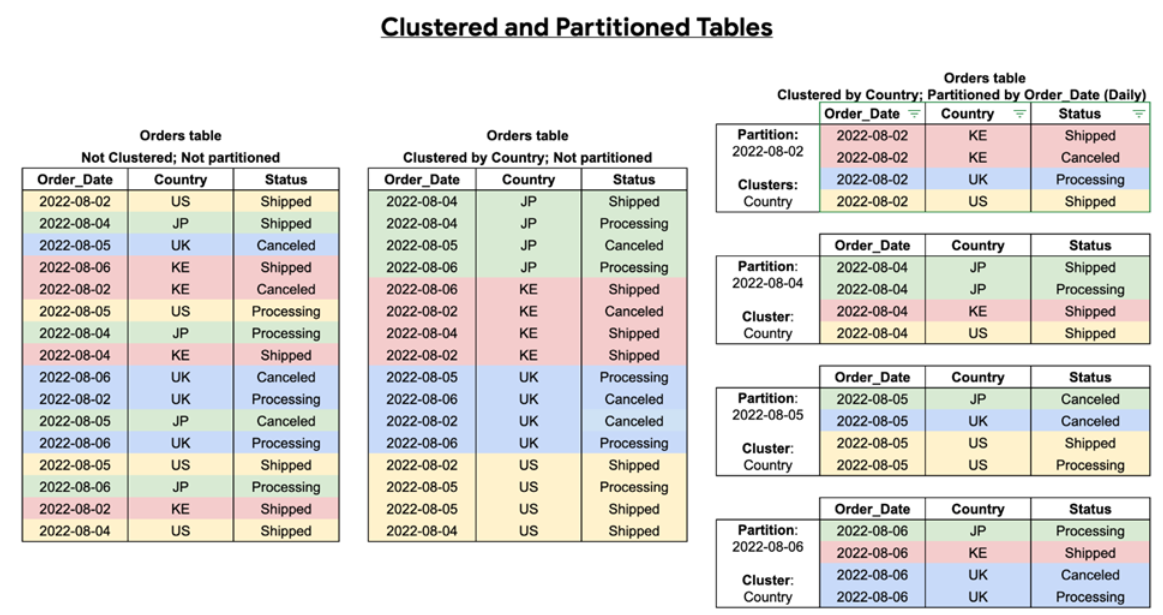


## Partitioning

> Basically splitting a table into smaller tables

Partitioning is dividing a table into smaller tables based on a single column (date or integer).

Examples:
- A table containing sales data could be partitioned by month using the column containing the sale date, or by geographic region using the state/province code;
- It is a good pratice to partition by date

Types of partitioning:
- Horizontal: assigning rows to different partitions;
- Vertical: assigning sets of columns to different partitions (must be done manually);

When partitioning a table horizontally, you must choose a **partition key** - a column whose values are used to assign a row to a particular partition. 

Partitioning methods:
- Range partitioning: 
  - break up tables by date ranges;
  - Allows for a maxvalue partition to catch any rows that don't map to any other partition
- List: 
  - allows you to specify which values will be assigned to each partition
  - Can be used with enumerated set of values, e.g. state codes (CA, TX, VA), currencies (USD, EUR, JPY)
  - doesn't provide for a spillover partition (to catch any rows that don't map to any other partition)
  - the column chosen as the partitioning key should contain only a small number of values
- Hash partitioning:
  - tries to distribute rows evenly across a set of partitions by applying a hashing function to the column value 
  - Hash partitioning works best when the partitioning key column contains a large number of distinct values
- Composite partitioning: 
  - Allows you to use two different types of partitioning for the same table

Check partitions - MySQL:

```sql
SELECT
    partition_name,
    partition_expression,
    partition_description
FROM information_schema.partitions
WHERE table_name = 'sales'
ORDER BY partition_ordinal_position;
```

Benefits:
- Partition pruning: You may only need to interact with as few as one partition instead of the entire table; 
- Partition-wise joins: if you execute a query that includes a join to a partitioned table and the query includes a condition on the partitioning column, the server can exclude any partitions that do not contain data pertinent to the query;
- An ability to delete data that is no longer needed, e.g. deleting a partition that is older than seven years old; 

Disadvantages:
- A table cannot be partitioned into an infinite number of partitions


## Clustering

> Basically it's just sorting

Clustering: 
- Basically just sorting by values in up to 4 columns
- Improves performance of some queries with filter and aggregate clauses
- Better done when cardinality of values in a column or group of columns is large



## Sharding

Partition the data across multiple databases; 

for example, if you were to employ this strategy for a social media company, you might decide to implement 100 separate databases, each one hosting the data for approximately 10 million users. 


# Tools

**Apache**: The Apache Software Foundation (ASF) exists to provide software for the public good. We believe in the power of community over code, known as The Apache Way. Thousands of people around the world contribute to ASF open source projects every day.

Tools:
- Hadoop: framework for big data storage and processing; <u>batch processing</u>
  - Consists of two layers:
    - Storage (HDFS): an abstraction that allows to use the storage of the cluster as if it was a single computer
    - Processing (MapReduce)
- Spark: framework for big data processing and analytics; 
  - Spark is a more efficient alternative to Hadoop's MapReduce
- Hive: 
  - one of the first attempts to allow users to query data stored in Hadoop
- Cassandra: NoSQL
- Kafka: works with real-time data streaming; for data ingestion; 

---

Apache Beam: a unified programming model for both batch and streaming.

Key Apache Beam concepts: 
- PCollections: immutable distributed datasets
- Transforms: operations like ParDo, GroupByKey, Combine
- DoFns: user-defined functions for processing elements
- Visualisation:  

# Pandas

You can use pandas dataframe's parameter `chunksize` to process a huge dataset
 in chunks. 
This way, you are using CPU to calculate over smaller chunks
without having to store the entire thing in your RAM.


In [32]:
import pandas as pd

"""
Load only the first 100 rows
"""
df_100 = pd.read_csv('../train.csv', nrows=100)
print(df_100.columns)
df_100

Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation'],
      dtype='object')


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
95,95,835457,2746,484,0,19,0,1,20000.0,True
96,96,0,5382,5000,0,0,0,1,NaN,NaN
97,97,39828,5382,3944,0,1,1,0,24000.0,False
98,98,132189,5382,217,0,2,0,1,35000.0,False


In [48]:
"""
Calculate average of a column
"""
from timeit import default_timer as timer
import numpy as np

list1, counter = [], 0
chunksize = 1000
how_many_chunks_to_process = 10000

start = timer()
for chunk in pd.read_csv('../train.csv', chunksize=chunksize):
    # list1.extend( chunk['content_id'].tolist() )
    ### Instead of the line above, where we append all lines to a list
    ### and then calculate average of everything at the end, 
    ### it is more optimal to append average of each chunk 
    ### and then at the end calculate average of averages, like in the operation below
    list1.append( np.mean(chunk['content_id'].tolist()) )
    ### If you want to process the entire data
    ### simply remove the counter and break below
    counter += 1
    # if counter == how_many_chunks_to_process:
    #     stop = timer()
    #     break

stop = timer()

print(f"Time consumed(s): {stop-start:,}")
print(f"Number of data points processed: {chunksize*counter:,}")
avrg = sum(list1) / len(list1)
print(f"Average of these data points: {avrg}")

Time consumed(s): 441.95269910000025
Number of data points processed: 10,000,000
Average of these data points: 5219.595430638324


In [47]:
"""
Grouby and count by groups and subgroups
"""
df = pd.read_csv('../train.csv', chunksize=1000)
counter = 0

output = pd.DataFrame()
for chunk in df:
    categories = ['user_id', 'content_type_id']
    details = chunk[categories]
    details['count'] = 1
    summary = details.groupby(categories).sum().reset_index()
    # output = output.append(summary, ignore_index=True)
    output = pd.concat([output, summary], ignore_index=True)
    counter += 1
    if counter == 10:
        break

display(output.head(15))

final_output = output.groupby(categories).sum().reset_index()
# final_output.to_csv('aggregated-information-from-big-data.csv', index=False)
final_output

C:\Users\evgen\AppData\Local\Temp\ipykernel_21268\3454544260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details['count'] = 1
C:\Users\evgen\AppData\Local\Temp\ipykernel_21268\3454544260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details['count'] = 1
C:\Users\evgen\AppData\Local\Temp\ipykernel_21268\3454544260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,user_id,content_type_id,count
0,115,0,46
1,124,0,30
2,2746,0,19
3,2746,1,1
4,5382,0,125
5,5382,1,3
6,8623,0,109
7,8623,1,3
8,8701,0,17
9,12741,0,265


,user_id,content_type_id,count
0,115,0,46
1,124,0,30
2,2746,0,19
3,2746,1,1
4,5382,0,125
5,5382,1,3
6,8623,0,109
7,8623,1,3
8,8701,0,17
9,12741,0,265


# Hadoop

Hadoop is an ecosystem, or a set of technologies and tools that work together.

- Has distributed processing of data which uses multiple computers to make calculations
- Three important components of Hadoop:
  - HDFS / Hadoop Distributed File System: used for storing data across multiple computers / servers
  - MapReduce: helps process data in parallel
    - this technology processes large amounts of structured and unstructured data by breaking a task into many small pieces that can be run in parallel across many servers;
  - YARN: a resource manager and job scheduler for HDFS

Limitations:
- Relies on storing data on disk, which makes things slower
- Processes data in batches only


# PySpark

**Introduction to Spark**

- Powerful tool for processing and analysing big data
- RDD: Resilient Distributed Dataset
- 100x faster than Hadoop
- Manages and coordinates the execution of tasks on data across a cluster of computers
- Components:
  - Spark Core
  - Spark SQL
  - Spark Streaming
  - Spark ML
- Spark uses lazy evaluation

https://www.youtube.com/watch?v=cZS5xYYIPzk&list=WL&index=5

**PySpark Installation**

`pip install pyspark`

from within your conda environment: `conda install openjdk`

**Some important notes**

PySpark DataFrame is not the same as Pandas DataFrame

directed acyclic graph (DAG) is the way Spark runs computations
- lazy execution
- optimization by planning ahead
- builds a graph of transformations and applies them lasily, only when it must

PySpark to Pandas
`pd_df = df.toPandas()`

Pandas to PySpark
`spark_df = spark.createDataFrame(pd_df)`


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import FloatType

### Initiate a Spark session
spark = SparkSession.builder.getOrCreate()
# spark = SparkSession.builder.appName('test').getOrCreate()

### Check session details
spark


In [2]:
### Read data

### Option 1: reads all columns as string
df = spark.read.csv(
    'clean_titanic_data.csv', 
    header=True,
    inferSchema=True, # get PySpark to infer the data schema by itself
    nullValue='NA' # Replace null values with another value
)
# df = spark.read.option('header', 'true').csv('clean_titanic_data.csv')
### You can also specify data schema
# schema = 'Age INTEGER, Sex STRING, ChestPainType STRING'
# df = spark.read.csv('name.csv', schema=schema, header=True)

### Saving data
### Cannot overwrite
# df.write.format('csv').save('path/to/save/output.csv')
### Overwrite if exists
# df.write.format('csv').mode('overwrite').save('path/to/save/output.csv')

df.show()
df.dtypes


+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+
|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Embarked|
+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+
|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|       S|
|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|       C|
|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|       S|
|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1|       S|
|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05|       S|
|       0|     3|    Moran, Mr. James|  male|28.0|    0|    0|          330877| 8.4583|       Q|
|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|           17463|51.8625|       S|
|       0|     3|Palsson, Mast

[('Survived', 'int'),
 ('Pclass', 'int'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'double'),
 ('SibSp', 'int'),
 ('Parch', 'int'),
 ('Ticket', 'string'),
 ('Fare', 'double'),
 ('Embarked', 'string')]

In [4]:
### Summary statistics
df.select(['Age', 'Sex']).describe().show()

+-------+------------------+------+
|summary|               Age|   Sex|
+-------+------------------+------+
|  count|               891|   891|
|   mean| 29.36158249158249|  NULL|
| stddev|13.019696550973201|  NULL|
|    min|              0.42|female|
|    max|              80.0|  male|
+-------+------------------+------+



In [6]:
### Show column data types
df.dtypes
df.printSchema()
### Change column data type
# df = df.withColumn('Age', df.Age.cast(FloatType()))

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Embarked: string (nullable = true)



In [7]:
### Remove column
# df.drop('Age')
### Rename column
# df.withColumnRenamed('Age', 'age')
### Rename multiple columns
# name_pairs = [('Age', 'age'), ('Sex', 'sex')]
# for old_name, new_name in name_pairs:
#     df = df.withColumnRenamed(old_name, new_name)

### Show the number of rows
df.count()
### Show first few rows of a table
df.show(3)
### Only for selected columns
df.select('Name').show(3)
df.select(['Name', 'Sex']).show(3)

+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+
|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Embarked|
+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+
|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|       S|
|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|       C|
|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|       S|
+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+
only showing top 3 rows

+--------------------+
|                Name|
+--------------------+
|Braund, Mr. Owen ...|
|Cumings, Mrs. Joh...|
|Heikkinen, Miss. ...|
+--------------------+
only showing top 3 rows

+--------------------+------+
|                Name|   Sex|
+--------------------+------+
|Braund, Mr. Owen ..

In [8]:
### SQL
df.createOrReplaceTempView('df') # add the table to the database catalog
df_top10 = spark.sql('SELECT * FROM df LIMIT 10')
df_top10.show()

spark.sql("SELECT * FROM df LIMIT 10").show()

# Can later convert the result of the query to a dataframe
tips10_df = df_top10.toPandas()
tips10_df

+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+
|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Embarked|
+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+
|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|       S|
|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|       C|
|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|       S|
|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1|       S|
|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05|       S|
|       0|     3|    Moran, Mr. James|  male|28.0|    0|    0|          330877| 8.4583|       Q|
|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|           17463|51.8625|       S|
|       0|     3|Palsson, Mast

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [9]:
### count
df.groupby('Pclass').count().show()

+------+-----+
|Pclass|count|
+------+-----+
|     1|  216|
|     3|  491|
|     2|  184|
+------+-----+



In [38]:
### Pivoting
df.groupby('Pclass').pivot('Sex').count().show()

+------+------+----+
|Pclass|female|male|
+------+------+----+
|     3|   144| 347|
|     1|    94| 122|
|     2|    76| 108|
+------+------+----+



In [10]:
### Filtering

### many interchangeable options
df.filter('age > 18')
df.where('age > 18')
df.where(df['age'] > 18)
### Use AND (&) or OR (|) operators
df.where((df['age'] > 18) & (df['sex'] == 'male'))
### Rows that do NOT meet the criteria
df.filter(~(df['Sex'] == 'male'))

df_03 = df.filter(df.Sex == 'female').filter(df.Pclass == 3)
df_03.show()

+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+
|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Embarked|
+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+
|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|       S|
|       1|     3|Johnson, Mrs. Osc...|female|27.0|    0|    2|          347742|11.1333|       S|
|       1|     3|Sandstrom, Miss. ...|female| 4.0|    1|    1|         PP 9549|   16.7|       S|
|       0|     3|Vestrom, Miss. Hu...|female|14.0|    0|    0|          350406| 7.8542|       S|
|       0|     3|Vander Planke, Mr...|female|31.0|    1|    0|          345763|   18.0|       S|
|       1|     3|Masselmani, Mrs. ...|female|28.0|    0|    0|            2649|  7.225|       C|
|       1|     3|"McGowan, Miss. A...|female|15.0|    0|    0|          330923| 8.0292|       Q|
|       0|     3|Palsson, Miss

In [13]:
### Evaluating a string
from pyspark.sql.functions import expr

survived_pclass = 'Survived * Pclass + 0'
df.withColumn('survived_pclass', expr(survived_pclass)).show(3)


+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+---------------+
|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Embarked|survived_pclass|
+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+---------------+
|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|       S|              0|
|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|       C|              1|
|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|       S|              3|
+--------+------+--------------------+------+----+-----+-----+----------------+-------+--------+---------------+
only showing top 3 rows



Dealing with null values: 

```py
### drop all rows that contain a single null value
df = df.na.drop()
### drop rows that has all null values
df = df.na.drop(how='all')
### drop rows that has the number of null values exceeding a specified threshold
df = df.na.drop(thresh=2)
### drop null values for specified columns only
df = df.na.drop(how='any', subset=['age', 'sex'])
### replace null values with a specified value
df = df.na.fill(value='?', subset=['sex'])

### Using imputer strategy
from pyspark.ml.feature import Imputer
imptr = Imputer(inputCols=['age', 'RestingBP'],
                outputCols=['age', 'RestingBP']).setStrategy('mean')
df = imptr.fit(df).transform(df)
```

In [17]:
df.groupby('Sex').agg({'Age': 'mean'}).show()

+------+------------------+
|   Sex|          avg(Age)|
+------+------------------+
|female|27.929936305732483|
|  male| 30.14067590987868|
+------+------------------+



In [18]:
from pyspark.sql.functions import desc

df.groupby('Sex').agg({'Age': 'mean'}).orderBy(desc('avg(Age)')).show()

+------+------------------+
|   Sex|          avg(Age)|
+------+------------------+
|  male| 30.14067590987868|
|female|27.929936305732483|
+------+------------------+



In [19]:
from pyspark.sql import functions as F

df.groupby('Sex').agg(F.min(df['Age']), F.avg(df['Pclass'])).show()

+------+--------+-----------------+
|   Sex|min(Age)|      avg(Pclass)|
+------+--------+-----------------+
|female|    0.75|2.159235668789809|
|  male|    0.42|2.389948006932409|
+------+--------+-----------------+



In [20]:
### Machine Learning with spark
# pyspark won't accept a table of feature column, but 
# needs a vector of feature columns

X_column_names = ['Age', 'SibSp']

from pyspark.ml.feature import VectorAssembler
df = df.withColumn('Age', df.Age.cast(FloatType()))
df = df.withColumn('SibSp', df.SibSp.cast(FloatType()))
df = df.withColumn('Survived', df.Survived.cast(FloatType()))
v_asmblr = VectorAssembler(inputCols=X_column_names, outputCol='Fvec')
df = v_asmblr.transform(df)


In [21]:
from pyspark.ml.regression import LinearRegression

model = LinearRegression(featuresCol='Fvec', labelCol='Survived')
model = model.fit(trainset)
print(model.coefficients, model.intercept)

model.evaluate(testset).predictions

NameError: name 'trainset' is not defined